In [1]:
title = "ogs@jupyter-lab: Elliptic: H process: Pumping well"
variable = "pressure"
coordinates = "r"

**ogs@jupyter-lab: Elliptic: H process: Pumping well**

<!--- ![tu-dresden-blue.png](attachment:tu-dresden-blue.png) --->
<img src="ogs-teaching.png" alt="drawing" width="300"/>

**Running ogs using [ogs6py](https://github.com/joergbuchwald/ogs6py)**

In [2]:
from ogs6py import ogs
#run ogs
PATH_OGS="/home/ok/ogs/build/release/bin/"
print("===============")
print(">>> run ogs <<<")
model = ogs.OGS(PROJECT_FILE="circle_1e3_axi.prj")
model.run_model(path=PATH_OGS,LOGFILE="console.log")

>>> run ogs <<<
OGS finished with project file circle_1e3_axi.prj.
Execution took 0.03668785095214844 s


**Extracting results using [VTUInterface](https://github.com/joergbuchwald/VTUinterface)**

>>> print results <<<
circle_1e3_axi.pvd


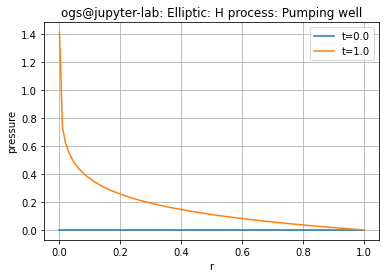

In [3]:
# read and process (point interpolation) vtu- and pvd-files 
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
print("=====================")
print(">>> print results <<<")
pvdfile=vtuIO.PVDIO("circle_1e3_axi.pvd", dim=1)
# define xaxis and diagonal (list)
xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=1.0, num=100)]
r_x = np.array(xaxis)[:,0]
# define timestep
time = [0.0,1.0]
# read and interpolate from vtu-files listed in pvd
for t in time:
    function_xaxis_t = pvdfile.read_point_set_data(t, 'pressure', pointsetarray=xaxis)
    plt.plot(r_x, function_xaxis_t, label='t='+str(t))
# plot formatting
plt.title(title)
#plt.xscale('log')
plt.xlabel(coordinates)
plt.ylabel(variable)
plt.legend()
plt.grid()
plt.savefig("profile.png")
plt.show()

In [4]:
import time
print(time.ctime())

Thu Jun  3 01:21:39 2021


**Results have been shown using [matplotlib](https://matplotlib.org/)**

**OGS links**
- description: https://www.opengeosys.org/docs/benchmarks/elliptic/elliptic-pde-with-dirichlet-and-nodal-source-term/
- project file: https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/Elliptic/circle_radius_1/circle_1e6_axi.prj
- notebook compilation by OK (https://github.com/OlafKolditz/ogs-jupyter-lab)

**Credits**
- Jörg Buchwald for ogs6py and VTUInterface (JOSS review pending) https://joss.theoj.org/papers/6ddcac13634c6373e6e808952fdf4abc
- Tom Fischer for this benchmark set up